#### Import necessary libraries:
  `numpy,pandas,sklearn and matplotlib`

In [7]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

#### Open the dataset with pandas

In [8]:
#parse the date as DATE format in pandas
df = pd.read_csv('dataset.csv',engine='c',parse_dates=['DATE'])

#Convert the date into a 64-bit integer
df.DATE = df.DATE.astype(np.int64)

#### Plot a  _correlation matrix_

,DATE,InterestRate,CPI,ExportImportRatio,USDTOINR
DATE,1.000000,-0.081891,0.991109,0.137728,0.938340
InterestRate,-0.081891,1.000000,0.012092,0.117362,0.156069
CPI,0.991109,0.012092,1.000000,0.171841,0.964674
ExportImportRatio,0.137728,0.117362,0.171841,1.000000,0.234697
USDTOINR,0.938340,0.156069,0.964674,0.234697,1.000000


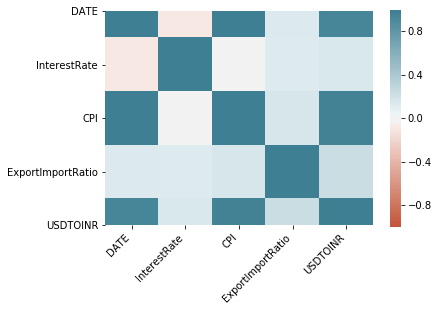

In [9]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
corr

> From the correlation matrix, we can infer that the CPI has high correlatin with the feature to be predicted - USD

In [5]:
df.head()

,DATE,InterestRate,CPI,ExportImportRatio,USDTOINR
0,1262304000000000000,6.0,65.795346,61.570824,45.8944
1,1264982400000000000,6.0,65.030284,60.227108,46.2732
2,1267401600000000000,6.0,65.030284,68.363886,45.4509
3,1270080000000000000,6.0,65.030284,57.266479,44.4440
4,1272672000000000000,6.0,65.795346,58.096419,45.7690


> The dataset after converting the dates into numerical values

### Training the model using Linear Regression
1. for a given date, predict the corresponding independent features - CPI,InterestRate and ExportImportRatio
2. Split the dataset into training and testing : 80% of the data is used for training and 20% is used for testing
3. Fit the model on the training dataset
4. Calculate the mean squared error and r2_score by comparing the model with the test dataset
5. Make a prediction for USD-INR for a date given by the user

Loss :  5.27
Accuracy :  92.26 %
Prediction : 1 USD = 74.68 INR


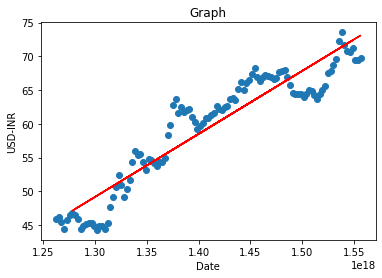

In [6]:
ls = []
def date_vs_features(date,feature):
    
    date = pd.to_datetime(pd.Series([date])).astype(np.int64)

    X = pd.DataFrame(df['DATE']).values
    y = pd.DataFrame(df[feature]).values

    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=62)

    reg = linear_model.LinearRegression()

    reg.fit(X_train,y_train)

    ls.append(reg.predict (np.array([date]).reshape(1,-1))[0][0])
    
def predict_USD(date):
    
    cols = list(df.columns)[1:4]
    for i in cols:
        date_vs_features(date,i)

    InterestRate,CPI,ExportImportRatio = ls
    
    date = pd.to_datetime(pd.Series([date])).astype(np.int64)

    X = df.drop('USDTOINR',axis=1).values
    y = pd.DataFrame(df['USDTOINR']).values


    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=62)

    reg = linear_model.LinearRegression()

    reg.fit(X_train,y_train)

    y_pred = reg.predict(X_test)
    
    plt.scatter(X[:,0],y[:,0])
    plt.plot(X_test[:,0],y_pred[:,0],'-r')
    plt.title('Graph')
    plt.xlabel('Date')
    plt.ylabel('USD-INR')
    
    print ("Loss : ",round((mean_squared_error(y_test,y_pred)),2))
    print ("Accuracy : ",round((r2_score(y_test,y_pred)*100),2),'%')
    
    USD = reg.predict (np.array([date,InterestRate,CPI,ExportImportRatio]).reshape(1,-1))
    
    return "Prediction : 1 USD = " + str(round(USD[0][0],2)) + " INR"

print (predict_USD('2019-11-13'))